In [1]:
!pip install git+https://github.com/eigenP/kymograph-py.git

  Cloning https://github.com/eigenP/kymograph-py.git to /tmp/pip-req-build-kolzq5yr
  Running command git clone --filter=blob:none --quiet https://github.com/eigenP/kymograph-py.git /tmp/pip-req-build-kolzq5yr
  Resolved https://github.com/eigenP/kymograph-py.git to commit 33f8eb721cf1aefd42a2d12fdbda5239f47e4725
  Preparing metadata (setup.py) ... done
  Created wheel for python_kymograph: filename=python_kymograph-0.1.0-py3-none-any.whl size=7474 sha256=2dc7c179b9bafe8976b1c8420929887fa534afe165739b931fe4d7b49dc2168a
  Stored in directory: /tmp/pip-ephem-wheel-cache-6oswssh8/wheels/55/b0/6d/1c6554d96e66b36c9cb9b83cebacddc797216ec77974bc4c86
Successfully built python_kymograph


In [3]:
from kymograph_py import make_kymograph

import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load sample data from skimage.data
from skimage.data import cells3d

# Assign the raw image to img_raw
img_raw = cells3d()
# Separate membranes and nuclei from the raw image
membranes = img_raw[:,0,...]
nuclei = img_raw[:,1,...]

# Set the image of interest to the nuclei
image = nuclei
# Add the image to the viewer with a name if working with napari
# viewer.add_image(image, name = 'Nuclei')
# viewer.add_image(membranes, name = 'Membranes')

In [35]:
make_kymograph?

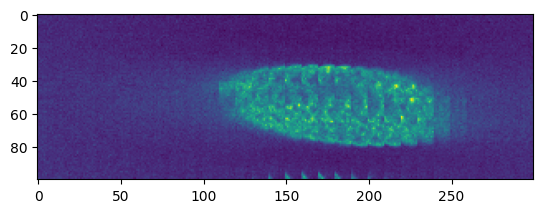

In [30]:
### centroids
# simply add the center of every frame (slightly adjusted) for demonstration
centroids_ = np.tile(np.array([int(nuclei.shape[1] // 2 * 1.2), int(nuclei.shape[2] // 2 * 0.85)]), (nuclei.shape[0], 1))

# Make kymograph
kymo = make_kymograph(image, centroids_,
                      width=10, height=100, skip_step=2)

plt.imshow(kymo)

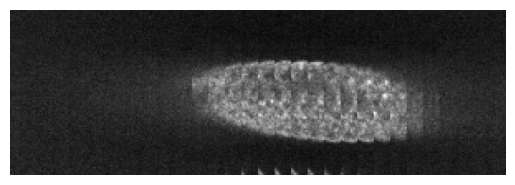

In [32]:
# Remove axes and change colormap
plt.imshow(kymo, cmap = 'gray')
plt.axis('off')
plt.show()